

---
# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
---

In [1]:
%reset -f
# omitir warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/ColabNotebooks/' # directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Librerías necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import json
import time
import threading
from pathlib import Path
import stat, getpass

# Instalación de la librería desde github

In [4]:
!pip -q install --upgrade --no-cache-dir git+https://github.com/MaicolDLC/download-merra2.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Creación del archivo .netrc

In [13]:
# Tu carpeta en Drive
drive_netrc = Path(path + ".netrc")

user = input("Usuario Earthdata: ").strip()
pwd = getpass.getpass("Password Earthdata: ")

drive_netrc.write_text(
    f"machine urs.earthdata.nasa.gov login {user} password {pwd}\n"
    f"machine goldsmr4.gesdisc.eosdis.nasa.gov login {user} password {pwd}\n",
    encoding="utf-8",
)

# Permisos en drive (si es que aplica)
try:
    drive_netrc.chmod(stat.S_IRUSR | stat.S_IWUSR)
except Exception:
    pass

root_netrc = Path("/root/.netrc")
root_netrc.write_text(drive_netrc.read_text(encoding="utf-8"), encoding="utf-8")
root_netrc.chmod(stat.S_IRUSR | stat.S_IWUSR)

print("Guardado en:", drive_netrc)
print("Activo en:", root_netrc)

Usuario Earthdata: maicoldlc
Password Earthdata: ··········
Guardado en: /content/drive/MyDrive/ColabNotebooks/.netrc
Activo en: /root/.netrc


# Ejemplo para archivos horarios (MERRA2)

---

### Nota: El catálogo no brinda archivos horarios como tal (24 archivos por día), lo que brinda es 1 archivo con las 24 horas.

---



In [14]:
# Importamos la librería
from merra2_downloader import Merra2Config, Merra2Client

cfg_h = Merra2Config(
    north=5, south=-20, west=-90, east=-70, # Ingresar zona de interés
    inicio="2023-10-01", # Ingresar fecha en formato YYYY-MM-DD
    fin="2023-11-30",
    producto="M2T1NXAER.5.12.4",  # Ejemplo de producto horario
    variables=[],                 # Vacío: descarga todas las variables
    # variables=["BCEXTTAU", "BCSCATAU"] # Especificando variables
    directorio= path + "merra2_horario", # Directorio de guardado
    max_workers=5, # Hilos de descarga
)

client = Merra2Client()
result = client.download_range(cfg_h)
print(result)
print(f"Se guardó en: {cfg_h.directorio}")

DownloadResult(exitosos=61, fallidos=0)
Se guardó en: /content/drive/MyDrive/ColabNotebooks/merra2_horario


# Ejemplo para archivos diurnos (MERRA2_DIURNAL)

In [15]:
# Importamos la librería
from merra2_downloader import Merra2Config, Merra2Client

cfg_d = Merra2Config(
    north=5, south=-20, west=-90, east=-70, # Ingresar zona de interés
    inicio="2023-10-01", # Ingresar fecha en formato YYYY-MM-DD (mantener -DD)
    fin="2023-11-30",
    producto="M2TUNXAER.5.12.4",  # <---- Cambiar
    variables=[],                 # Vacío: descarga todas las variables
    directorio= path + "merra2_diurno", # Directorio de guardado
    max_workers=5, # Hilos de descarga
)

client = Merra2Client()
result = client.download_range(cfg_d)
print(result)
print(f"Se guardó en: {cfg_d.directorio}")

DownloadResult(exitosos=2, fallidos=0)
Se guardó en: /content/drive/MyDrive/ColabNotebooks/merra2_diurno


# Ejemplo para archivos Mensuales (MERRA2_MONTHLY)

In [16]:
# Importamos la librería
from merra2_downloader import Merra2Config, Merra2Client

cfg_m = Merra2Config(
    north=5, south=-20, west=-90, east=-70, # Ingresar zona de interés
    inicio="2023-10-01", # Ingresar fecha en formato YYYY-MM-DD (mantener -DD)
    fin="2023-11-30",
    producto="M2TMNXAER.5.12.4",  # <---- Cambiar
    variables=[],                 # Vacío: descarga todas las variables
    directorio= path + "merra2_mensual", # Directorio de guardado
    max_workers=5, # Hilos de descarga
)

client = Merra2Client()
result = client.download_range(cfg_m)
print(result)
print(f"Se guardó en: {cfg_m.directorio}")

DownloadResult(exitosos=2, fallidos=0)
Se guardó en: /content/drive/MyDrive/ColabNotebooks/merra2_mensual


In [17]:
cfg_h.directorio

'/content/drive/MyDrive/ColabNotebooks/merra2_horario'

In [23]:
ds_h = xr.open_mfdataset(cfg_h.directorio + "/MERRA2_400.tavg1_2d_aer_Nx.2023*.nc4")
ds_h

<xarray.Dataset> Size: 493MB
Dimensions:    (time: 1464, lat: 51, lon: 33)
Coordinates:
  * time       (time) datetime64[ns] 12kB 2023-10-01T00:30:00 ... 2023-11-30T...
  * lat        (lat) float64 408B -20.0 -19.5 -19.0 -18.5 ... 3.5 4.0 4.5 5.0
  * lon        (lon) float64 264B -90.0 -89.38 -88.75 ... -71.25 -70.62 -70.0
Data variables: (12/50)
    SSANGSTR   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    DMSCMASS   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    SO4SMASS   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    BCCMASS    (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    SO2CMASS   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    SSSMASS    (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    ...         ...
    DUANGSTR   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    SSSCAT25   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    SUEXTTAU   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    DMSSMASS   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    DUSCATAU   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
    OCANGSTR   (time, lat, lon) float32 10MB dask.array<chunksize=(24, 51, 33), meta=np.ndarray>
Attributes: (12/34)
    History:                           Translated to CF-1.0 Conventions by Ne...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_aer_Nx.20231001.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    RangeEndingDate:                   2023-10-01
    RangeEndingTime:                   23:59:59.000000
    geospatial_lat_min:                -20.25
    geospatial_lat_max:                5.25
    geospatial_lon_min:                -90.3125
    geospatial_lon_max:                -69.6875

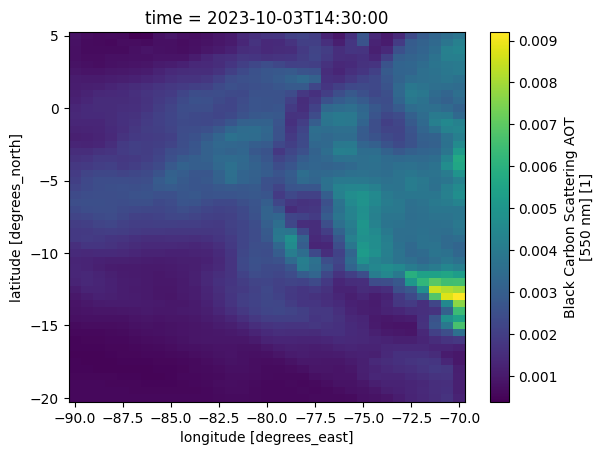

In [24]:
ds_h['BCSCATAU'].sel(time='2023-10-03T14:30').plot()